In [36]:
import pandas as pd
from hanziconv import HanziConv 
import unicodedata
import jieba
from stopwordsiso import stopwords
import emoji
from snownlp import SnowNLP
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

from tensorflow.keras.initializers import Constant
from keras.models import Sequential
from keras.layers import Dense, Flatten, Embedding, ReLU, Dropout, Input, CuDNNLSTM, LSTM
from keras.models import Model
from keras.optimizers import RMSprop


from keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [37]:
from gensim.models import Word2Vec
import gensim

In [38]:
df = pd.read_csv("../Sem1/doubanRawData/finalized_reviews.csv", delimiter= ',')
X = df[["short_comment","score", "movie_name"]].copy()
Y = df[["Fake"]].copy()
X.head()

,short_comment,score,movie_name
0,没想到，这是唯一一部尊重春节档的电影。,4,这个杀手不太冷静
1,能给负分吗卧槽 浪费我时间,1,独行月球
2,太痛苦了 大过年一大早让我如坐针毡,1,这个杀手不太冷静
3,要不是电影院没开空调一直冻我 我能直接睡过去,2,唐人街探案3
4,低俗谄媚粗制滥造，连起码的诚意都没有，推理全靠奇情轶闻，笑点东拼西凑，初一起了个大早去看电影...,2,唐人街探案3


In [39]:
stopwords(["zh"])

{'、',
 '。',
 '〈',
 '〉',
 '《',
 '》',
 '一',
 '一个',
 '一些',
 '一何',
 '一切',
 '一则',
 '一方面',
 '一旦',
 '一来',
 '一样',
 '一种',
 '一般',
 '一转眼',
 '七',
 '万一',
 '三',
 '上',
 '上下',
 '下',
 '不',
 '不仅',
 '不但',
 '不光',
 '不单',
 '不只',
 '不外乎',
 '不如',
 '不妨',
 '不尽',
 '不尽然',
 '不得',
 '不怕',
 '不惟',
 '不成',
 '不拘',
 '不料',
 '不是',
 '不比',
 '不然',
 '不特',
 '不独',
 '不管',
 '不至于',
 '不若',
 '不论',
 '不过',
 '不问',
 '与',
 '与其',
 '与其说',
 '与否',
 '与此同时',
 '且',
 '且不说',
 '且说',
 '两者',
 '个',
 '个别',
 '中',
 '临',
 '为',
 '为了',
 '为什么',
 '为何',
 '为止',
 '为此',
 '为着',
 '乃',
 '乃至',
 '乃至于',
 '么',
 '之',
 '之一',
 '之所以',
 '之类',
 '乌乎',
 '乎',
 '乘',
 '九',
 '也',
 '也好',
 '也罢',
 '了',
 '二',
 '二来',
 '于',
 '于是',
 '于是乎',
 '云云',
 '云尔',
 '五',
 '些',
 '亦',
 '人',
 '人们',
 '人家',
 '什',
 '什么',
 '什么样',
 '今',
 '介于',
 '仍',
 '仍旧',
 '从',
 '从此',
 '从而',
 '他',
 '他人',
 '他们',
 '他们们',
 '以',
 '以上',
 '以为',
 '以便',
 '以免',
 '以及',
 '以故',
 '以期',
 '以来',
 '以至',
 '以至于',
 '以致',
 '们',
 '任',
 '任何',
 '任凭',
 '会',
 '似的',
 '但',
 '但凡',
 '但是',
 '何',
 '何以',
 '何况',
 '何处',
 '何时',
 '余外',
 '作为',
 '你',
 '你们',
 '使',


In [40]:
stopwords(["zh"])

stopwords_ZH = [HanziConv.toSimplified(i) for i in stopwords(["zh"])]
stopwords_ZH

['啊',
 '这一来',
 '冒',
 '哉',
 '怎样',
 '咳',
 '假若',
 '反而',
 '总而言之',
 '这么样',
 '与否',
 '月',
 '｛',
 '此时',
 '孰知',
 '或是',
 '呗',
 '贼死',
 '例如',
 '先不先',
 '惟其',
 '综上所述',
 '那儿',
 '等等',
 '随时',
 '越是',
 '腾',
 '己',
 '正如',
 '介于',
 '即使',
 '八',
 '一旦',
 '不成',
 '譬喻',
 '七',
 '与其',
 '才',
 '且',
 '并且',
 '反过来说',
 '都',
 '区',
 '朝着',
 '不妨',
 '不特',
 '也好',
 '反之',
 '哪里',
 '还要',
 '尔尔',
 '呵',
 '没奈何',
 '｝',
 '不尽然',
 '哗',
 '宁肯',
 '不独',
 '更',
 '虽然',
 '再者说',
 '看',
 '可以',
 '以期',
 '始而',
 '鄙人',
 '～',
 '或',
 '冲',
 '到',
 '个别',
 '当然',
 '就是了',
 '要',
 '或者',
 '赖以',
 '哪个',
 '所在',
 '嘎登',
 '哪儿',
 '恰恰相反',
 '由于',
 '他',
 '而是',
 '着',
 '各',
 '离',
 '何况',
 '和',
 '既然',
 '只怕',
 '地',
 '此次',
 '自各儿',
 '这就是说',
 '全部',
 '再其次',
 '这么',
 '再有',
 '仍旧',
 '别',
 '呵呵',
 '哦',
 '彼此',
 '乘',
 '慢说',
 '较之',
 '五',
 '光',
 '中',
 '才能',
 '宁愿',
 '由此',
 '一切',
 '谁',
 '哪样',
 '以便',
 '类如',
 '几',
 '哎呀',
 '不拘',
 '再则',
 '因着',
 '那么样',
 '咦',
 '阿',
 '自身',
 '的话',
 '《',
 '什么样',
 '＋',
 '俺',
 '眨眼',
 '据此',
 '后',
 '较',
 '于是乎',
 '］',
 '纵令',
 '除非',
 '若是',
 '［',
 '依照',
 '比及',
 '九',
 '归',
 '以',


In [41]:
# add voacb dict to jieba for tokenization
jieba.load_userdict("new_slang_dict.txt")
def tokenize(word):
    return list(jieba.cut(word))

stopwords_list = list(stopwords(["zh"]))
punc_list = '[\.\!︕\/_,$%^*(+\"\']+|[+——！，。？、~@#￥%……&*（）：；《）《》“”()»〔〕-]+-_-Ｄ '
def removal_sw(text_tokens):
    return [word for word in text_tokens if not word in stopwords_ZH and not word in punc_list]


In [42]:
X["mention_of_movie_name"] = 0
for i in range(len(X)):
    X["mention_of_movie_name"].iloc[i] = str(X["short_comment"].iloc[i]).count(str(X["movie_name"]))
X

C:\Users\Kelvin\AppData\Local\Temp\ipykernel_27428\2297005332.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["mention_of_movie_name"].iloc[i] = str(X["short_comment"].iloc[i]).count(str(X["movie_name"]))


,short_comment,score,movie_name,mention_of_movie_name
0,没想到，这是唯一一部尊重春节档的电影。,4,这个杀手不太冷静,0
1,能给负分吗卧槽 浪费我时间,1,独行月球,0
2,太痛苦了 大过年一大早让我如坐针毡,1,这个杀手不太冷静,0
3,要不是电影院没开空调一直冻我 我能直接睡过去,2,唐人街探案3,0
4,低俗谄媚粗制滥造，连起码的诚意都没有，推理全靠奇情轶闻，笑点东拼西凑，初一起了个大早去看电影...,2,唐人街探案3,0
...,...,...,...,...
1595,披着推理外衣的合家欢喜剧片。最后的强行煽情让人似曾相识，名侦探柯南都是这么结尾的。,3,唐人街探案3,0
1596,至少比暗恋强点,3,一周的朋友,0
1597,感觉还差点意思，看出四字努力了，但那装酷时用力的嘴再稍稍放松点就好了，这样表情会自然些。女生...,2,送你一朵小红花,0
1598,有点好笑，又觉得没啥好看的。,3,这个杀手不太冷静,0


In [43]:
X['ori_chinese_count'] = 0

def word_count(words):
  wordcount = 0
  wordcount_CN = 0
  wordcount_EN = 0
  wordcount_N = 0
  start = True
  for word in words:
    cat = unicodedata.category(word)
    if cat == 'Lo':        # Chinese Letter
      wordcount += 1       # each letter counted as a word
      wordcount_CN += 1
      start = True                       
    elif cat[0] == 'P':    # Some kind of punctuation
      # wordcount += 1     
      start = True                       
    elif cat[0] == 'Z':    # Some kind of separator
      start = True
    else:                  # Everything else
      if start:            
        wordcount += 1     # Only count at the start
        if cat[0]== 'N':
            wordcount_N += 1
        else:
            wordcount_EN += 1
      start = False
  return (wordcount_CN, wordcount_EN, wordcount_N, wordcount) 

for i in range(len(X)):
  X.at[i, "ori_chinese_count"] = word_count(X["short_comment"].iloc[i])[0]

X

,short_comment,score,movie_name,mention_of_movie_name,ori_chinese_count
0,没想到，这是唯一一部尊重春节档的电影。,4,这个杀手不太冷静,0,17
1,能给负分吗卧槽 浪费我时间,1,独行月球,0,12
2,太痛苦了 大过年一大早让我如坐针毡,1,这个杀手不太冷静,0,16
3,要不是电影院没开空调一直冻我 我能直接睡过去,2,唐人街探案3,0,21
4,低俗谄媚粗制滥造，连起码的诚意都没有，推理全靠奇情轶闻，笑点东拼西凑，初一起了个大早去看电影...,2,唐人街探案3,0,77
...,...,...,...,...,...
1595,披着推理外衣的合家欢喜剧片。最后的强行煽情让人似曾相识，名侦探柯南都是这么结尾的。,3,唐人街探案3,0,38
1596,至少比暗恋强点,3,一周的朋友,0,7
1597,感觉还差点意思，看出四字努力了，但那装酷时用力的嘴再稍稍放松点就好了，这样表情会自然些。女生...,2,送你一朵小红花,0,61
1598,有点好笑，又觉得没啥好看的。,3,这个杀手不太冷静,0,12


In [44]:
def calculate_lexical_diversity(text):
    words = jieba.lcut(text)
    unique_words = set(words)
    return len(unique_words) / len(words)

def calculate_expressiveness(text):
    s = SnowNLP(text)
    adjectives_and_adverbs = 0
    nouns_and_verbs = 0
    for sentence in s.sentences:
        tags = SnowNLP(sentence).tags
        for tag in tags:
            if tag[1] in ['a', 'ad', 'd']:
                adjectives_and_adverbs += 1
            elif tag[1] in ['n', 'v']:
                nouns_and_verbs += 1
    if nouns_and_verbs == 0:
        return 0
    else:
        return adjectives_and_adverbs / nouns_and_verbs

def calculate_readability(text):
    sentences = jieba.cut(text)
    num_sentences = 0
    num_words = 0
    num_conjunctions = 0
    num_adverbs = 0
    for sentence in sentences:
        words = sentence.split()
        num_sentences += 1
        num_words += len(words)
        for word in words:
            tag = list(SnowNLP(word).tags)
            #print(tag)
            if tag[0][1] == 'c':
                num_conjunctions += 1
            elif tag[0][1] == 'd':
                num_adverbs += 1
    if num_sentences == 0:
        return 0
    else:
        average_words_per_sentence = num_words / num_sentences
        percentage_conjunctions_and_adverbs = (num_conjunctions + num_adverbs) / num_words
        return (average_words_per_sentence + percentage_conjunctions_and_adverbs) / 2

In [45]:
X["lexical_diversity"] = 0
X["expressiveness"] = 0
X["readability"] = 0

for i in range(len(X)):
  X.at[i, "lexical_diversity"] = calculate_lexical_diversity(X["short_comment"].iloc[i])
  X.at[i, "expressiveness"] = calculate_expressiveness(X["short_comment"].iloc[i])
  X.at[i, "readability"] = calculate_readability(X["short_comment"].iloc[i])

X

,short_comment,score,movie_name,mention_of_movie_name,ori_chinese_count,lexical_diversity,expressiveness,readability
0,没想到，这是唯一一部尊重春节档的电影。,4,这个杀手不太冷静,0,17,1.000000,0.250000,0.545455
1,能给负分吗卧槽 浪费我时间,1,独行月球,0,12,1.000000,0.000000,0.444444
2,太痛苦了 大过年一大早让我如坐针毡,1,这个杀手不太冷静,0,16,1.000000,1.500000,0.444444
3,要不是电影院没开空调一直冻我 我能直接睡过去,2,唐人街探案3,0,21,1.000000,0.500000,0.503788
4,低俗谄媚粗制滥造，连起码的诚意都没有，推理全靠奇情轶闻，笑点东拼西凑，初一起了个大早去看电影...,2,唐人街探案3,0,77,0.807018,0.470588,0.535088
...,...,...,...,...,...,...,...,...
1595,披着推理外衣的合家欢喜剧片。最后的强行煽情让人似曾相识，名侦探柯南都是这么结尾的。,3,唐人街探案3,0,38,0.880000,0.375000,0.520000
1596,至少比暗恋强点,3,一周的朋友,0,7,1.000000,0.000000,0.600000
1597,感觉还差点意思，看出四字努力了，但那装酷时用力的嘴再稍稍放松点就好了，这样表情会自然些。女生...,2,送你一朵小红花,0,61,0.826087,0.846154,0.576087
1598,有点好笑，又觉得没啥好看的。,3,这个杀手不太冷静,0,12,1.000000,1.000000,0.600000


In [46]:
X['short_comment'] = X['short_comment'].apply(HanziConv.toTraditional)
X

,short_comment,score,movie_name,mention_of_movie_name,ori_chinese_count,lexical_diversity,expressiveness,readability
0,沒想到，這是唯一一部尊重春節檔的電影。,4,这个杀手不太冷静,0,17,1.000000,0.250000,0.545455
1,能給負分嗎臥槽 浪費我時間,1,独行月球,0,12,1.000000,0.000000,0.444444
2,太痛苦瞭 大過年一大早讓我如坐針氈,1,这个杀手不太冷静,0,16,1.000000,1.500000,0.444444
3,要不是電影院沒開空調一直凍我 我能直接睡過去,2,唐人街探案3,0,21,1.000000,0.500000,0.503788
4,低俗諂媚粗製濫造，連起碼的誠意都沒有，推理全靠奇情軼聞，笑點東拼西湊，初一起瞭個大早去看電影...,2,唐人街探案3,0,77,0.807018,0.470588,0.535088
...,...,...,...,...,...,...,...,...
1595,披著推理外衣的閤傢歡喜劇片。最後的強行煽情讓人似曾相識，名偵探柯南都是這麼結尾的。,3,唐人街探案3,0,38,0.880000,0.375000,0.520000
1596,至少比暗戀強點,3,一周的朋友,0,7,1.000000,0.000000,0.600000
1597,感覺還差點意思，看齣四字努力瞭，但那裝酷時用力的嘴再稍稍放鬆點就好瞭，這樣錶情會自然些。女生...,2,送你一朵小红花,0,61,0.826087,0.846154,0.576087
1598,有點好笑，又覺得沒啥好看的。,3,这个杀手不太冷静,0,12,1.000000,1.000000,0.600000


In [47]:
X['text'] = X['short_comment'].apply(tokenize)
X = X.drop("short_comment", axis=1)
X = X[list(("text", "score", "mention_of_movie_name", "ori_chinese_count", "lexical_diversity", "expressiveness", "readability"))]
X

,text,score,mention_of_movie_name,ori_chinese_count,lexical_diversity,expressiveness,readability
0,"[沒, 想到, ，, 這是, 唯一, 一部, 尊重, 春節, 檔, 的, 電影, 。]",4,0,17,1.000000,0.250000,0.545455
1,"[能給, 負分, 嗎, 臥槽, , 浪費, 我, 時間]",1,0,12,1.000000,0.000000,0.444444
2,"[太, 痛苦, 瞭, , 大過, 年, 一大早, 讓, 我, 如, 坐針, 氈]",1,0,16,1.000000,1.500000,0.444444
3,"[要不是, 電, 影院, 沒開, 空調, 一直, 凍, 我, , 我能, 直接, 睡過, 去]",2,0,21,1.000000,0.500000,0.503788
4,"[低俗, 諂媚, 粗, 製, 濫, 造, ，, 連起碼, 的, 誠意, 都, 沒, 有, ，...",2,0,77,0.807018,0.470588,0.535088
...,...,...,...,...,...,...,...
1595,"[披著, 推理, 外衣, 的, 閤, 傢, 歡喜, 劇片, 。, 最後的, 強行, 煽情, ...",3,0,38,0.880000,0.375000,0.520000
1596,"[至少, 比, 暗戀, 強點]",3,0,7,1.000000,0.000000,0.600000
1597,"[感覺, 還差點, 意思, ，, 看, 齣, 四字, 努力, 瞭, ，, 但, 那, 裝酷,...",2,0,61,0.826087,0.846154,0.576087
1598,"[有點, 好笑, ，, 又, 覺得, 沒, 啥, 好看, 的, 。]",3,0,12,1.000000,1.000000,0.600000


In [48]:
X['text'] = X['text'].apply(removal_sw)
X

,text,score,mention_of_movie_name,ori_chinese_count,lexical_diversity,expressiveness,readability
0,"[沒, 想到, 這是, 唯一, 一部, 尊重, 春節, 檔, 電影]",4,0,17,1.000000,0.250000,0.545455
1,"[能給, 負分, 嗎, 臥槽, 浪費, 時間]",1,0,12,1.000000,0.000000,0.444444
2,"[太, 痛苦, 瞭, 大過, 一大早, 讓, 坐針, 氈]",1,0,16,1.000000,1.500000,0.444444
3,"[電, 影院, 沒開, 空調, 一直, 凍, 我能, 直接, 睡過]",2,0,21,1.000000,0.500000,0.503788
4,"[低俗, 諂媚, 粗, 製, 濫, 造, 連起碼, 誠意, 沒, 推理, 全靠, 奇情, 軼...",2,0,77,0.807018,0.470588,0.535088
...,...,...,...,...,...,...,...
1595,"[披著, 推理, 外衣, 閤, 傢, 歡喜, 劇片, 最後的, 強行, 煽情, 讓, 似曾,...",3,0,38,0.880000,0.375000,0.520000
1596,"[至少, 暗戀, 強點]",3,0,7,1.000000,0.000000,0.600000
1597,"[感覺, 還差點, 意思, 齣, 四字, 努力, 瞭, 裝酷, 時, 用力, 嘴, 稍稍, ...",2,0,61,0.826087,0.846154,0.576087
1598,"[有點, 好笑, 覺得, 沒, 好看]",3,0,12,1.000000,1.000000,0.600000


In [49]:
def contain_emoji(text):
    # global emoji_no
    # is_contain = False
    emoji_no = 0
    for word in text:
        if emoji.is_emoji(word):
            emoji_no += 1
            # is_contain = True
    return emoji_no

for i in range(len(X)):
    emoji_no = contain_emoji(X["text"].iloc[i])
    if emoji_no>0:
        X["text"].iloc[i] = [word for word in X["text"].iloc[i] if not emoji.is_emoji(word)] 
    X.at[i, "Emoji"] = int(emoji_no)

X['Emoji'] = X['Emoji'].astype('int')

X

C:\Users\Kelvin\AppData\Local\Temp\ipykernel_27428\980319746.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["text"].iloc[i] = [word for word in X["text"].iloc[i] if not emoji.is_emoji(word)]


,text,score,mention_of_movie_name,ori_chinese_count,lexical_diversity,expressiveness,readability,Emoji
0,"[沒, 想到, 這是, 唯一, 一部, 尊重, 春節, 檔, 電影]",4,0,17,1.000000,0.250000,0.545455,0
1,"[能給, 負分, 嗎, 臥槽, 浪費, 時間]",1,0,12,1.000000,0.000000,0.444444,0
2,"[太, 痛苦, 瞭, 大過, 一大早, 讓, 坐針, 氈]",1,0,16,1.000000,1.500000,0.444444,0
3,"[電, 影院, 沒開, 空調, 一直, 凍, 我能, 直接, 睡過]",2,0,21,1.000000,0.500000,0.503788,0
4,"[低俗, 諂媚, 粗, 製, 濫, 造, 連起碼, 誠意, 沒, 推理, 全靠, 奇情, 軼...",2,0,77,0.807018,0.470588,0.535088,0
...,...,...,...,...,...,...,...,...
1595,"[披著, 推理, 外衣, 閤, 傢, 歡喜, 劇片, 最後的, 強行, 煽情, 讓, 似曾,...",3,0,38,0.880000,0.375000,0.520000,0
1596,"[至少, 暗戀, 強點]",3,0,7,1.000000,0.000000,0.600000,0
1597,"[感覺, 還差點, 意思, 齣, 四字, 努力, 瞭, 裝酷, 時, 用力, 嘴, 稍稍, ...",2,0,61,0.826087,0.846154,0.576087,0
1598,"[有點, 好笑, 覺得, 沒, 好看]",3,0,12,1.000000,1.000000,0.600000,0


In [50]:
X["chinese_count"] = 0
X["english_count"] = 0
X["number_count"] = 0

for i in range(len(X)):
  wordcount_list = [0, 0, 0, 0]
  for words in X["text"].iloc[i]:
    wordcount_list = [a + b for a, b in zip(wordcount_list, word_count(words))]
  X.at[i, "chinese_count"] = wordcount_list[0]
  X.at[i, "english_count"] = wordcount_list[1]
  X.at[i, "number_count"] = wordcount_list[2]

X

,text,score,mention_of_movie_name,ori_chinese_count,lexical_diversity,expressiveness,readability,Emoji,chinese_count,english_count,number_count
0,"[沒, 想到, 這是, 唯一, 一部, 尊重, 春節, 檔, 電影]",4,0,17,1.000000,0.250000,0.545455,0,16,0,0
1,"[能給, 負分, 嗎, 臥槽, 浪費, 時間]",1,0,12,1.000000,0.000000,0.444444,0,11,0,0
2,"[太, 痛苦, 瞭, 大過, 一大早, 讓, 坐針, 氈]",1,0,16,1.000000,1.500000,0.444444,0,13,0,0
3,"[電, 影院, 沒開, 空調, 一直, 凍, 我能, 直接, 睡過]",2,0,21,1.000000,0.500000,0.503788,0,16,0,0
4,"[低俗, 諂媚, 粗, 製, 濫, 造, 連起碼, 誠意, 沒, 推理, 全靠, 奇情, 軼...",2,0,77,0.807018,0.470588,0.535088,0,70,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1595,"[披著, 推理, 外衣, 閤, 傢, 歡喜, 劇片, 最後的, 強行, 煽情, 讓, 似曾,...",3,0,38,0.880000,0.375000,0.520000,0,33,0,0
1596,"[至少, 暗戀, 強點]",3,0,7,1.000000,0.000000,0.600000,0,6,0,0
1597,"[感覺, 還差點, 意思, 齣, 四字, 努力, 瞭, 裝酷, 時, 用力, 嘴, 稍稍, ...",2,0,61,0.826087,0.846154,0.576087,0,47,0,0
1598,"[有點, 好笑, 覺得, 沒, 好看]",3,0,12,1.000000,1.000000,0.600000,0,9,0,0


In [51]:
X["Sentiment"] = 0

for i in range(len(X)):
    sentiment_sum = 0
    count = 0
    # if it is Chinese token:
    for word in X["text"].iloc[i]:
        cat = unicodedata.category(word[0])
        if not (cat == 'Ll' or cat == 'Lu'):
            sentiment_sum += SnowNLP(word).sentiments
            count += 1
    if count == 0:
        X.at[i, "Sentiment"] = 0.5 # neutral 
    else:
        X.at[i, "Sentiment"] = sentiment_sum/count

In [52]:
X

,text,score,mention_of_movie_name,ori_chinese_count,lexical_diversity,expressiveness,readability,Emoji,chinese_count,english_count,number_count,Sentiment
0,"[沒, 想到, 這是, 唯一, 一部, 尊重, 春節, 檔, 電影]",4,0,17,1.000000,0.250000,0.545455,0,16,0,0,0.447862
1,"[能給, 負分, 嗎, 臥槽, 浪費, 時間]",1,0,12,1.000000,0.000000,0.444444,0,11,0,0,0.247365
2,"[太, 痛苦, 瞭, 大過, 一大早, 讓, 坐針, 氈]",1,0,16,1.000000,1.500000,0.444444,0,13,0,0,0.524936
3,"[電, 影院, 沒開, 空調, 一直, 凍, 我能, 直接, 睡過]",2,0,21,1.000000,0.500000,0.503788,0,16,0,0,0.437627
4,"[低俗, 諂媚, 粗, 製, 濫, 造, 連起碼, 誠意, 沒, 推理, 全靠, 奇情, 軼...",2,0,77,0.807018,0.470588,0.535088,0,70,0,1,0.463901
...,...,...,...,...,...,...,...,...,...,...,...,...
1595,"[披著, 推理, 外衣, 閤, 傢, 歡喜, 劇片, 最後的, 強行, 煽情, 讓, 似曾,...",3,0,38,0.880000,0.375000,0.520000,0,33,0,0,0.417930
1596,"[至少, 暗戀, 強點]",3,0,7,1.000000,0.000000,0.600000,0,6,0,0,0.416879
1597,"[感覺, 還差點, 意思, 齣, 四字, 努力, 瞭, 裝酷, 時, 用力, 嘴, 稍稍, ...",2,0,61,0.826087,0.846154,0.576087,0,47,0,0,0.506789
1598,"[有點, 好笑, 覺得, 沒, 好看]",3,0,12,1.000000,1.000000,0.600000,0,9,0,0,0.432512


<Axes: ylabel='Sentiment'>

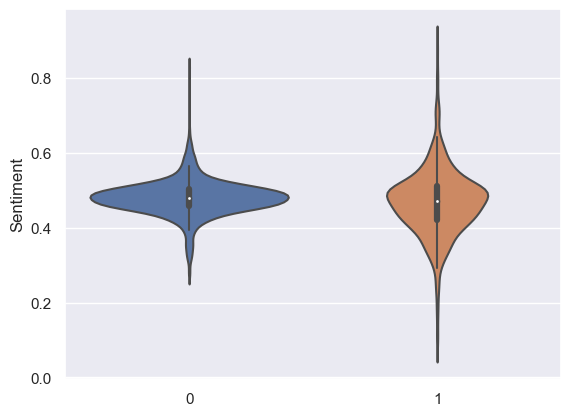

In [53]:
sns.set(style="darkgrid")
sns.violinplot(y=X["Sentiment"], x=list(Y["Fake"]))


<Axes: ylabel='score'>

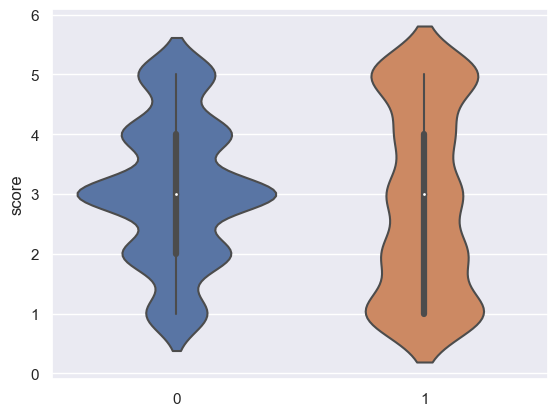

In [54]:
sns.violinplot(y=X["score"], x=list(Y["Fake"]))

<Axes: ylabel='number_count'>

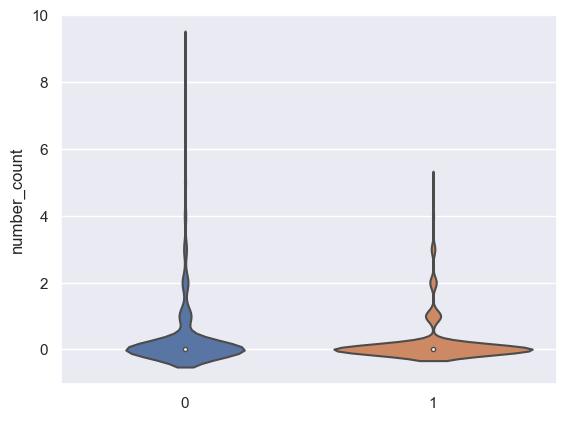

In [55]:
sns.violinplot(y=X["number_count"], x=list(Y["Fake"]))

<Axes: ylabel='english_count'>

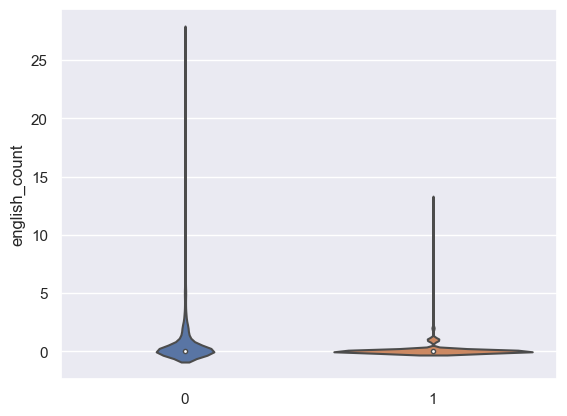

In [56]:
sns.violinplot(y=X["english_count"], x=list(Y["Fake"]))

<Axes: ylabel='chinese_count'>

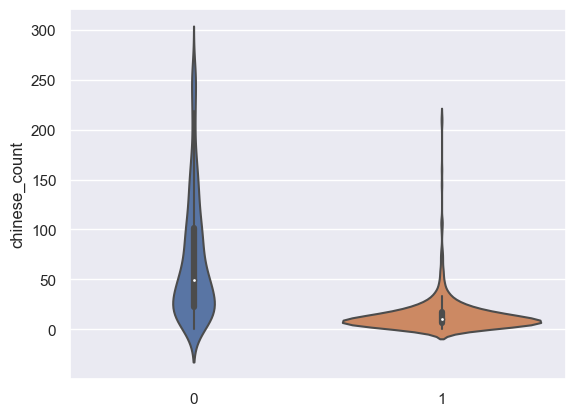

In [57]:
sns.violinplot(y=X["chinese_count"], x=list(Y["Fake"]))

<Axes: ylabel='ori_chinese_count'>

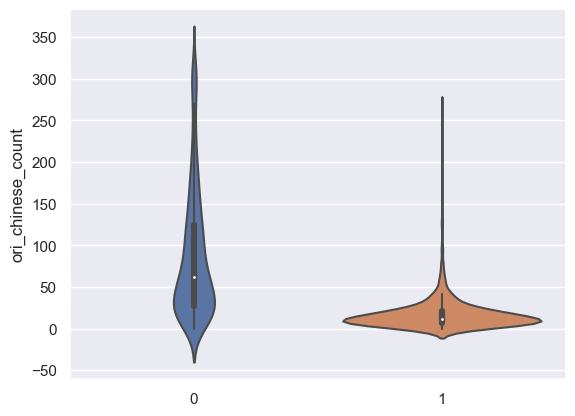

In [58]:
sns.violinplot(y=X["ori_chinese_count"], x=list(Y["Fake"]))

<Axes: ylabel='Emoji'>

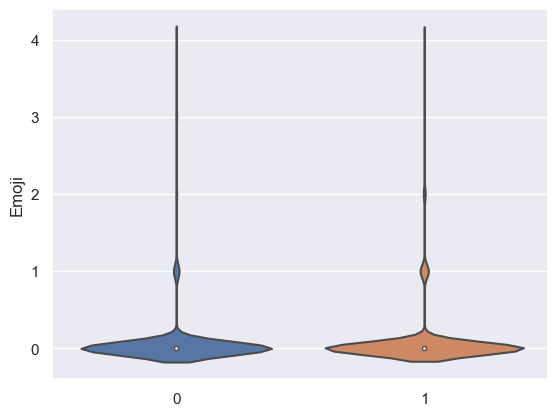

In [59]:
sns.violinplot(y=X["Emoji"], x=list(Y["Fake"]))

<Axes: ylabel='lexical_diversity'>

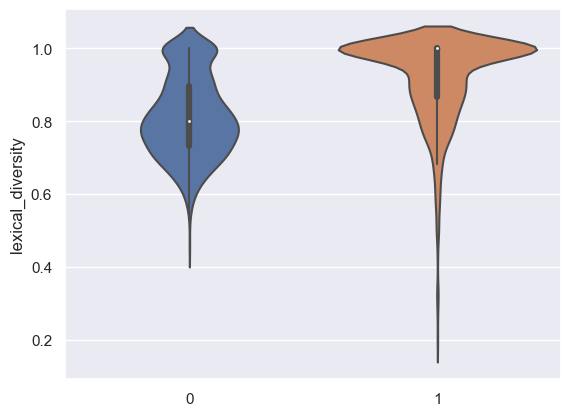

In [60]:
sns.violinplot(y=X["lexical_diversity"], x=list(Y["Fake"]))

<Axes: ylabel='expressiveness'>

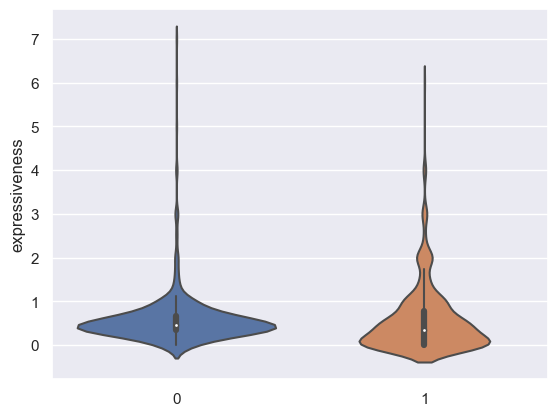

In [61]:
sns.violinplot(y=X["expressiveness"], x=list(Y["Fake"]))

<Axes: ylabel='readability'>

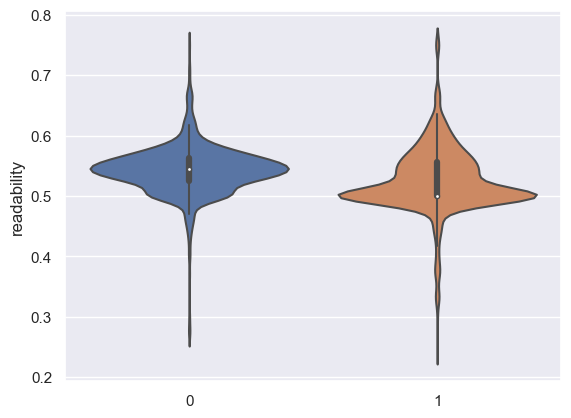

In [62]:
sns.violinplot(y=X["readability"], x=list(Y["Fake"]))

In [63]:
X = X.drop("Emoji", axis=1)
X = X.drop("ori_chinese_count", axis=1)

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 17)
X_train

,text,score,mention_of_movie_name,lexical_diversity,expressiveness,readability,chinese_count,english_count,number_count,Sentiment
566,"[懂, 對, 浪漫, 過敏, 嗎, 這還, 好看]",5,0,0.888889,1.250000,0.583333,11,0,0,0.497639
1001,"[原作, 油膩, 很多, 前, 一半, 還, 後, 麵, 看不下去, 瞭, 主要, 對, 開...",2,0,0.796875,0.400000,0.562500,79,0,0,0.503984
224,"[內核, 較, 老套, 雞湯, 說, 教味, 太濃]",3,0,1.000000,1.333333,0.500000,12,0,0,0.498763
496,"[十歲, 觀影, 適齡]",2,0,1.000000,0.000000,0.500000,6,0,0,0.360671
722,"[好笑, 相比, 大銀幕, 劉昊然, 易, 烊, 韆, 璽, 我覺, 魏翔, 值得]",4,0,0.894737,0.500000,0.552632,20,0,0,0.514422
...,...,...,...,...,...,...,...,...,...,...
406,"[實在, 太難, 瞭, 推薦, 傢, 看看, 朋友, 新導, 大片, 刺客]",1,0,1.000000,0.600000,0.500000,18,0,0,0.581009
1414,"[人群, 似乎, 總帶, 著濾鏡, 美劇, 國, 産, 劇, 標簽, 一貼, 似乎, 已經,...",5,0,0.697917,0.571429,0.552083,108,0,0,0.502892
143,"[口紅, 太紅]",3,0,1.000000,4.000000,0.625000,4,0,0,0.551845
1265,"[這, 密室, 太弱, 看過, 100, 集柯南, 就夠, 瞭, 八點, 檔劇情, 忒, 煩...",3,0,0.802469,1.000000,0.550945,76,6,3,0.454700


In [65]:
# def my_train_test_split(data_x, data_y, rows_per_group, alpha=0.8):
#     # Split the DataFrame into groups of similar rows
#     groups_x = np.array_split(data_x, len(data_x) / rows_per_group)
#     groups_y = np.array_split(data_y, len(data_y) / rows_per_group)

#     # Combine the groups and their corresponding labels into tuples
#     combined = list(zip(groups_x, groups_y))

#     # Shuffle the combined data
#     np.random.shuffle(combined)

#     # Determine the size of the train and test sets
#     train_size = int(alpha * len(combined))
#     test_size = len(combined) - train_size

#     # Separate the shuffled data back into groups
#     train_groups = combined[:train_size]
#     test_groups = combined[train_size:]

#     # Split the groups back into separate X and Y dataframes
#     x_train = pd.concat([group[0] for group in train_groups])
#     y_train = pd.concat([group[1] for group in train_groups])
#     x_test = pd.concat([group[0] for group in test_groups])
#     y_test = pd.concat([group[1] for group in test_groups])

#     return x_train, x_test, y_train, y_test

# # Split the data into train and test sets
# X_train, X_test, y_train, y_test = my_train_test_split(X, Y, rows_per_group=4, alpha=0.8)

# # Print the results
# print("Training set X:\n", X_train)
# print("Training set Y:\n", y_train)
# print("Testing set X:\n", X_test)
# print("Testing set Y:\n", y_test)

In [66]:
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [67]:
def dummy_fun(doc):
    return doc

tfidf = TfidfVectorizer(tokenizer=dummy_fun, preprocessor=dummy_fun, token_pattern=None, use_idf=True) 


In [68]:
temp_text = list(X_train["text"])
temp_X = tfidf.fit_transform(temp_text)
mydf = pd.DataFrame(temp_X.toarray(), columns=tfidf.get_feature_names_out())

X_train_tfidf = pd.concat([X_train, mydf], axis=1)
X_train_tfidf = X_train_tfidf.drop("text", axis=1)
print(X_train_tfidf)
X_train_tfidf.to_csv("X_train_tfidf_no_aug.csv", index=False)


      score  mention_of_movie_name  lexical_diversity  expressiveness  \
0         5                      0           0.888889        1.250000   
1         2                      0           0.796875        0.400000   
2         3                      0           1.000000        1.333333   
3         2                      0           1.000000        0.000000   
4         4                      0           0.894737        0.500000   
...     ...                    ...                ...             ...   
1275      1                      0           1.000000        0.600000   
1276      5                      0           0.697917        0.571429   
1277      3                      0           1.000000        4.000000   
1278      3                      0           0.802469        1.000000   
1279      1                      0           1.000000        2.000000   

      readability  chinese_count  english_count  number_count  Sentiment   \t  \
0        0.583333             11          

In [69]:
temp_text = list(X_test["text"])
temp_X = tfidf.transform(temp_text)
mydf = pd.DataFrame(temp_X.toarray(), columns=tfidf.get_feature_names_out())

X_test_tfidf = pd.concat([X_test, mydf], axis=1)
X_test_tfidf = X_test_tfidf.drop("text", axis=1)
print(X_test_tfidf)
X_test_tfidf.to_csv("X_test_tfidf_no_aug.csv", index=False)


     score  mention_of_movie_name  lexical_diversity  expressiveness  \
0        4                      0           0.772727        0.833333   
1        5                      0           1.000000        0.333333   
2        5                      0           0.691667        0.380952   
3        3                      0           1.000000        0.000000   
4        4                      0           0.823529        0.375000   
..     ...                    ...                ...             ...   
315      3                      0           0.815385        0.565217   
316      1                      0           1.000000        0.666667   
317      2                      0           1.000000        0.000000   
318      4                      0           0.909091        1.333333   
319      3                      0           1.000000        0.500000   

     readability  chinese_count  english_count  number_count  Sentiment   \t  \
0       0.556818             41              0         

In [71]:
y_train.to_csv("y_train_no_aug.csv", index=False)
y_test.to_csv("y_test_no_aug.csv", index=False)